# NBN Package

This notebook summarises the data available via the `rnbn` package. The vignette provided with the package provides a better overview of the package --- this notebook just demonstrates what needs to be done to get started with it.

##Setup

`rnbn` is straight forward to get; we just need to install it from CRAN.

In [2]:

install.packages('rnbn')
library(rnbn)


The downloaded binary packages are in
	/var/folders/y_/wsxrd3b16k99k229_7f38sph0000gn/T//RtmpFm8TKJ/downloaded_packages


Warning message:
: package ‘rnbn’ was built under R version 3.1.2

In [3]:
vignette('rnbn_vignette')

## Logging In

The NBN data service needs a username and password. The vignette contains instructions on how to get one. It's not strictly necessary to run `nbnLogin`; all the functions in the package will call `nbnLogin` automatically if you aren't already logged in.

In this case I'm hiding my details in my environment to stop them getting printed out to the console.

In [4]:
#Change these if running.
nbn.user <- Sys.getenv("NBN_USER")
nbn.password <- Sys.getenv("NBN_PASSWORD")

nbnLogin(nbn.user,nbn.password)

##Data Organisation
The NBN set is principally designed to log observations of species in different locations at different times. This is an abstraction over the underlying data generated from studies and data sets.

Data are principally organised by TVKs (Taxon Version Keys). A Taxon is simply a thing that can have observations logged about it. The package includes a function to get the TVKs for names of species to make the mapping easier.

This shows one of several views of the NBN data we can access; the taxon-level information which includes more details on the species and some aggregate stats.

In [7]:
head(getTVKQuery(query="badger"))

,entityType,searchMatchTitle,descript,pExtendedName,taxonVersionKey,name,languageKey,taxonOutputGroupKey,taxonOutputGroupName,organismKey,rank,nameStatus,versionForm,gatewayRecordCount,href,ptaxonVersionKey
1,taxon,Badger,"Meles meles (Linnaeus, 1758), TERRESTRIAL MAMMAL, 63970 record(s)","Meles meles (Linnaeus, 1758), TERRESTRIAL MAMMAL",NBNSYS0000164968,Badger,en,NHMSYS0000080085,terrestrial mammal,NBNORG0000049711,Species,Synonym,Well-formed,63970,https://data.nbn.org.uk/Taxa/NHMSYS0000080191,NHMSYS0000080191
2,taxon,Badger Flea,"Paraceras melis (Walker, 1856), INSECT - FLEA (SIPHONAPTERA), 472 record(s)","Paraceras melis (Walker, 1856), INSECT - FLEA (SIPHONAPTERA)",NBNSYS0000164969,Badger Flea,en,NHMSYS0000629161,insect - flea (Siphonaptera),NBNORG0000013049,Species,Recommended,Well-formed,472,https://data.nbn.org.uk/Taxa/NBNSYS0000013055,NBNSYS0000013055
3,taxon,a Badger flea,"Chaetopsylla (Chaetopsylla) trichosa Kohaut, 1903, INSECT - FLEA (SIPHONAPTERA), 2 record(s)","Chaetopsylla (Chaetopsylla) trichosa Kohaut, 1903, INSECT - FLEA (SIPHONAPTERA)",NHMSYS0020322599,a Badger flea,en,NHMSYS0000629161,insect - flea (Siphonaptera),NBNORG0000061712,Species,Recommended,Well-formed,2,https://data.nbn.org.uk/Taxa/NHMSYS0000545919,NHMSYS0000545919
4,taxon,Eurasian Badger,"Meles meles (Linnaeus, 1758), TERRESTRIAL MAMMAL, 63970 record(s)","Meles meles (Linnaeus, 1758), TERRESTRIAL MAMMAL",NHMSYS0000332260,Eurasian Badger,en,NHMSYS0000080085,terrestrial mammal,NBNORG0000049711,Species,Recommended,Well-formed,63970,https://data.nbn.org.uk/Taxa/NHMSYS0000080191,NHMSYS0000080191


Lists are OK, but usually we just want the top result:

In [9]:
getTVKQuery(query="badger", top=T)

,entityType,searchMatchTitle,descript,pExtendedName,taxonVersionKey,name,languageKey,taxonOutputGroupKey,taxonOutputGroupName,organismKey,rank,nameStatus,versionForm,gatewayRecordCount,href,ptaxonVersionKey
1,taxon,Badger,"Meles meles (Linnaeus, 1758), TERRESTRIAL MAMMAL, 63970 record(s)","Meles meles (Linnaeus, 1758), TERRESTRIAL MAMMAL",NBNSYS0000164968,Badger,en,NHMSYS0000080085,terrestrial mammal,NBNORG0000049711,Species,Synonym,Well-formed,63970,https://data.nbn.org.uk/Taxa/NHMSYS0000080191,NHMSYS0000080191


Armed with a Taxon Version Key, you can then interrogate the NBN database for observations of that species.

[1] 1811

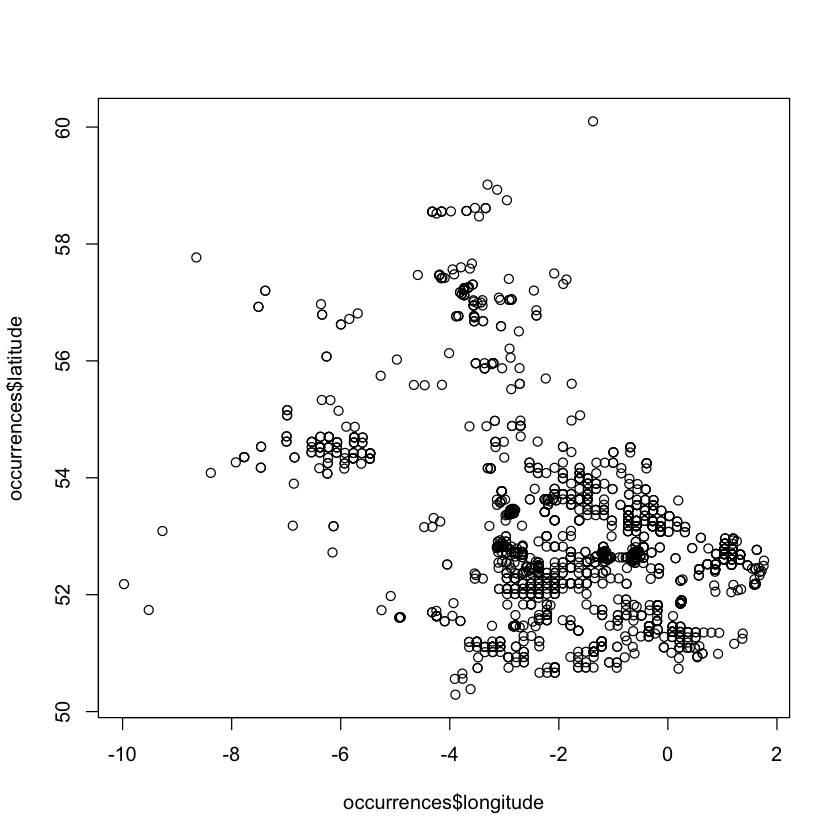

In [16]:
mushroom <- getTVKQuery(query="mushroom", top=T)
occurrences <- getOccurrences(tvks = mushroom$ptaxonVersionKey,silent=T,acceptTandC=T)
nrow(occurrences)
plot(occurrences$longitude,occurrences$latitude)

We can plot this a little nicer using ggmap:

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=UK&zoom=5&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false


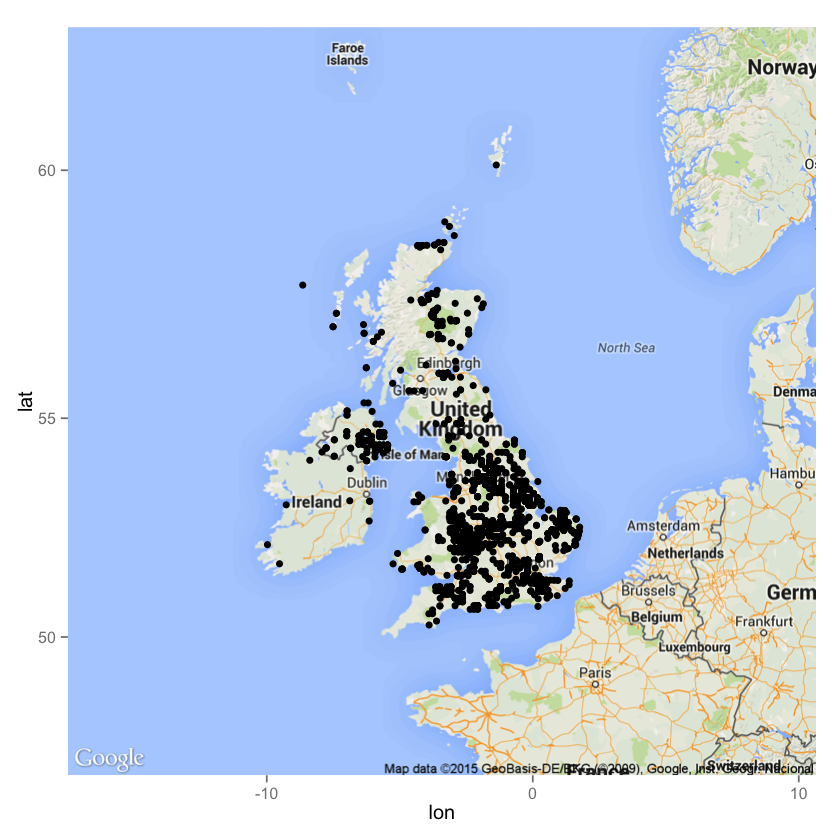

In [15]:
library(ggmap)
uk <- get_map("UK", zoom=5, source="google", scale=2,maptype="roadmap")
ggmap(uk) + 
    geom_point(data=occurrences, aes(longitude,latitude))

This shows how to get the "raw" data out: observations of the species. Alongside the observations, the NBN gateway also records metadata associated with the survey/reporter that logged an observation. The metadata also includes licensing and usage constraints that apply to the data.